<a href="https://pandas.pydata.org/"><img src=https://pandas.pydata.org/static/img/pandas.svg width="200" alt="pandas logo"></a>

# Lernmodul zum Datenimport und zur Datenvorbereitung mit pandas

Bei Pandas handelt es sich um eine der beliebtesten Python Library zur Datenanalyse. Diese stellt verschiedene Funktionalitäten zum Datenimport, zur Datenanalyse und zur Datenmanipulation zur Verfügung. Mithilfe dieses Lernmoduls soll der Umgang mit Pandas erlernt und geübt werden. Dabei wird der Fokus auf den Datenimport und die Datenvorbereitung gelegt, indem die dafür zur Verfügung stehenden grundlegenden Funktionalitäten erläutert werden. Es wird empfohlen die Aufgaben zwischen den einzelnen Inhalten zu bearbeiten, nachdem die Erläuterungen gelesen wurden. Am Ende des Lernmoduls kann das gesammelte Wissen in einem kleinen Projekt nochmal vertieft werden.

**Übersicht über die Lerninhalte:**

1. [Grundlagen zu Pandas](#grundlagen)  
    1.1 [Pandas importieren](#importPandas)  
    1.2 [Erläuterungen der Datenstrukturen](#datenstrukturen)    
2. [Daten importieren und extrahieren](#import)  
    2.1 [Importieren von Daten aus einer Datenbank](#dbImport)  
    2.2 [Importieren von Daten aus einer csv Datei](#csvImport)  
    2.3 [Zusammenführen von Daten](#mergeData)  
    2.4 [Export von Daten in eine Datenbank](#dbExport)  
    2.5 [Export von Daten in eine csv Datei](#csvExport)  
    2.6 [Übungsteil](#uebungsteil2)  
3. [Daten analysieren](#datenanalyse)  
    3.1 [Anzeigen der Daten](#datenAnzeigen)  
    3.2 [Erstellen einer Kopie der Daten](#kopie)  
    3.3 [Beschreiben der Daten](#datenBeschreiben)  
    3.4 [Zugriff auf Datenwerte](#datenZugriff)  
    3.5 [Bedingte Auswahl von Daten](#datenBedingung)  
    3.6 [Umbenennen von Spaltennamen](#spaltenUmbenennen)  
    3.7 [Datentypen der Spalten](#datentypen)  
    3.8 [Untersuchen der Daten](#datenUntersuchen)  
    3.9 [Übungsteil](#uebungsteil3)  
4. [Daten bereinigen](#datenbereinigung)  
5. [Daten transformieren](#datenmanipulation)  

**Lernziele:**

Die Teilnehmer erwerben Grundkenntnisse im Umgang mit der Library Pandas. Sie kennen die grundlegenden Datenstrukturen in Pandas und können Daten aus diversen Quellen (z. B. Datenbank, csv-Datei) importieren. Zudem sind sie in der Lage die Daten zu untersuchen und für die weitere Verarbeitung in z. B. ML Modellen vorzubereiten. Dafür beherrschen sie diverse Methoden zur Bereinigung und zur Transformation der Daten, die von Pandas zur Verfügung gestellt werden.

**Voraussetzungen:**
- Grundlegende Python Kenntnisse
- Umgang mit Jupyter Notebooks


**Setup für die Aufgabenüberprüfung**

In [1]:
from taskreview.learningModule import LearningModule

# Lernmodul-Instanz erstellen
pandas_lm = LearningModule('data/lernmodul_pandas.db')

<div style="background-color: #150458 ; padding: 5px; "></div>

## **1** <a id='grundlagen'>Grundlagen zu Pandas</a>

### Pandas installieren

Pandas kann entweder mit Anaconda oder Miniconda installiert werden oder mithilfe von pip:

- Anaconda/ Miniconda: conda install Pandas

- pip: pip install pandas


### **1.1** <a id='importPandas'>Pandas importieren</a>

Nachdem pandas installiert wurde, kann es in einer Datei importiert werden. Der Import findet mithilfe folgender Codezeile statt:

In [2]:
import pandas as pd

### **1.2** <a id='datenstrukturen'>Erläuterungen der Datenstrukturen</a>

Es gibt zwei grundlegende Datenobjekte in pandas: den DataFrame und die Series. Im Folgenden werden diese beiden kurz vorgestellt.

**DataFrame**

Bei einem DataFrame handelt es sich um eine Tabelle mit verschiedenen Einträgen. Ein DataFrame besteht aus drei Bestandteilen: Daten, Spalten und Zeilen. Die Daten können von einem beliebigen Datentyp sein (zum Beispiel Integer, String, Date, Float, Boolean, usw.) und werden mithilfe der Spalten und Zeilen gegliedert. 

In der Praxis werden DataFrames erzeugt, indem Daten aus externen Speichern eingelesen werden, zu diesen Speichermedien gehören: Datenbanken, csv Dateien und Excel Dateien (siehe Abschnitt *2 Datenimport und -export*). DataFrames können allerdings auch aus zum Beispiel Listen oder Dictonaries erzeugt werden. Dafür wird der Konstruktur `pd.DataFrame()` genutzt. Beispielhaft wird dies im Folgenden mithilfe eines Dictonary von Listen gezeigt. Dabei bilden die Keys des Dictionary die Spaltennamen und die Values beinhalten eine Liste mit Einträgen.

In [3]:
data = {'Vorname': ['Max', 'Lisa'], 'Nachname': ['Mustermann', 'Musterfrau'], 'Alter': [20, 23], 'Lieblingsfilm': ['Star Wars', 'Titanic']}
 
# Erzeugen eines DataFrames mithilfe des Konstruktors
df = pd.DataFrame(data)
df

,Vorname,Nachname,Alter,Lieblingsfilm
0,Max,Mustermann,20,Star Wars
1,Lisa,Musterfrau,23,Titanic


In manchen Fällen ist es gewünscht anstatt einer aufsteigenden Nummer als Zeilenbeschriftungen eigene Beschriftungen festzulegen. Die Liste der Zeilenbeschriftungen wird Index genannt. Mithilfe des `index` Parameters des Konstruktors können eigene Beschriftungen übergeben werden.

In [4]:
df = pd.DataFrame(data, index=['Person 1', 'Person 2'])
df

,Vorname,Nachname,Alter,Lieblingsfilm
Person 1,Max,Mustermann,20,Star Wars
Person 2,Lisa,Musterfrau,23,Titanic


**Series**

Eine Series ist ein eindimensionaler gelabelter Array, das jegliche Datentypen beinhalten kann. Sie kann als eine einzelnen Spalte einer Tabelle angesehen werden. Auch hier können Zeilenbeschriftungen mithilfe des index Parameters hinzugefügt werden. Eine Series hat allerdings keinen Spaltennamen, sondern einen Gesamtnamen. Dieser kann über den Parameter `name` festgelegt werden. Zur Erzeugung einer Series kannn zum Beispiel eine Liste oder ein Dictonary genutzt werden. Im Folgenden wird dies beispielhaft mit einer Liste demonstriert.

In [5]:
# Liste mit Daten
list = ['Max', 'Lisa', 'Sandra', 'Daniel']
# Zeilenbeschriftungen
index = ['Person 1', 'Person 2', 'Person 3', 'Person 4']
  
# Series aus einer Liste erzeugen
ser = pd.Series(list, index, name='Vorname')
print(ser)

Person 1       Max
Person 2      Lisa
Person 3    Sandra
Person 4    Daniel
Name: Vorname, dtype: object


<div style="background-color: #150458 ; padding: 5px; "></div>

## **2** <a id='import'>Datenimport und -export </a>

In den meisten Fällen werden Daten nicht händisch erzeugt, wie im vorherigen Abschnitt. Die meisten Zeit werden Daten genutzt, die bereits existieren. Diese Daten müssen dafür allerdings zunächst importiert werden. Im folgenden Abschnitt wird der Datenimport aus einer Datenbank oder einer csv Datei näher betrachtet. Aus den importierten Daten soll ein DataFrame erzeugt werden, um die Daten mit pandas für weitere Schritte vorbereiten zu können. Nachdem diese Vorbereitung stattgefunden hat sollen die Daten zwischengespeichert werden. Dafür wird der Datenexport genauer unter die Lupe genommen.

### **2.1** <a id='dbImport'>Importieren von Daten aus einer Datenbank</a>

Zum Herstellung einer Datenbankverbindung muss ein entsprechendes Package passend zu der Datenbank installiert und importiert werden.
Im Folgenden wird dies am Beispiel einer SQLite Datenbank gezeigt. Um die Verbindung herzustellen, muss der `connect` Methode des importierten sqlite3 Package der Pfad zu der Datenbank übergeben werden. Mithilfe der Methode `read_sql_query` können dann diverse SQL Abfragen ausgeführt werden. Der Methode werden dafür die SQL Abfrage und die Datenbankverbindung übergeben. Die abgefragten Daten werden automatisch in einen DataFrame gespeichert. Nach Beendigung der Abfragen sollte die Datenbankverbindung wieder geschlossen werden.

In [6]:
import sqlite3

# Herstellen der Datenbankverbindung
con = sqlite3.connect('data/lernmodul_pandas.db')
# Auslesen der Daten aus der Datenbank und Speicherung der Daten in einem DataFrame
netflix_titles_df = pd.read_sql_query('SELECT * from netflix_titles', con)

# Schließen der Datenbankverbindung
con.close()

Zum Verifizieren, dass die Daten importiert und in dem DataFrame gespeichert wurden, kann zum Beispiel die Anzahl der Tabellenzeilen abgefragt werden. Dafür kann die Python Funktion `len()` genutzt werden.

**2.1.1 Nutze die Funktion len(), um zu verifizieren, dass Daten importiert wurden. Wie viele Zeilen sind in dem importieren Daten enthalten?**

In [7]:
# Platz für Code
len(netflix_titles_df)

6234

In [8]:
pandas_lm.show_task(211)

Output()

Output()

Output()

### **2.2** <a id='csvImport'>Importieren von Daten aus einer csv Datei</a>

Mithilfe der pandas Methode `read_csv` können Daten aus einer csv Datei als pandas DataFrame importiert werden. 

In [9]:
netflix_titles_df = pd.read_csv('data/netflix_titles.csv')

In [10]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Durch die Methode `head` eines DataFrames werden die ersten 5 Zeilen des DataFrames angezeigt. Dies kann auch zur Verifizierung genutzt werden, ob der Import der Daten geklappt hat.

**2.2.2 Nutze die Methode `head`, um den Datenimport zu verifizieren. Welchen Titel trägt der Film in der zweiten Zeile?**

In [11]:
# Platz für Code
df_head = netflix_titles_df.head()

In [12]:
#TODO Single Choice
pandas_lm.show_task(222)

Output()

Output()

Output()

### **2.3** <a id='mergeData'>Zusammenführen von Daten</a>

Manchmal sind nicht alle Daten in einer einzigen Datenquelle vorhanden, um denoch alle relevanten Informationen in einem DataFrame vorliegen zu haben, müssen die einzelnen DataFrames mithilfe der `merge` Methode eines DataFrames zusammengeführt werden. 

In dem DataFrame `liebingsshow_df` ist jeweils die Lieblingsshow von unterschiedlichen Personen eingetragen. Leider ist aus der ID der Show nicht direkt ersichtlich, um welche es sich genau handelt. Um diese Information zu erhalten muss in dem vorherigen erstellten DataFrame `netflix_titles_df` nachgesehen werden. In diesem Fall macht es Sinn die beiden DataFrames zu mergen. Damit zwei DataFrames miteinander gemerged werden können ist es wichtig, dass ein eindeutiger Identifier vorliegt, über den die beiden DataFrames verbunden werden können. In dem Beispiel wäre das die Spalte `show_id`.


In [13]:
lieblingsshows = {'ID': [1, 2, 3, 4], 'Name': ['Lisa', 'Dirk', 'Jan', 'Verena'], 'show_id': [80057969, 80117902, 70234439, 70196145]}
lieblingsshows_df = pd.DataFrame.from_dict(lieblingsshows)

# on - Spaltennamen durch die die beiden DataFrames gemerged werden sollen
# how - auf welche Art und Weise die DataFrames gemerged werden sollen (left, right, outer, inner)
merged_df = lieblingsshows_df.merge(netflix_titles_df, how= 'left', on='show_id')

In [14]:
merged_df

,ID,Name,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Lisa,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
1,2,Dirk,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
2,3,Jan,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,4,Verena,70196145,TV Show,New Girl,NaN,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m..."


### **2.4** <a id='dbExport'>Export von Daten in eine Datenbank</a>

Im Folgenden wird gezeigt, wie ein DataFrame wieder als Datenbanktabelle exportiert werden kann. Dafür wird erneut die SQLite Datenbank genutzt. Nachdem wie Verbindung zu der Datenbank hergestellt wurde, kann mithilfe der DataFrame Methode `to_sql` der jeweilige DataFrame als Datenbanktabelle exportiert werden. Dafür müssen als Parameter der Name der zu erstellenden Datenbanktabelle sowie die Datenbankverbindung übergeben werden. Optional kann zum Beispiel verhindert werden, dass der Index mit exportiert wird. Ein DataFrame kann defaultmäßig nur einmal in dieselbe Datenbanktabelle exportiert werden, d. h. bei der zweiten Ausführung würde eine Exception geworfen werden, weil die Datenbanktabelle bereits existiert. In diesem Fall kann mithilfe des Parameters `if_exist` festgelegt werden, dass die existierende Tabelle überschrieben werden soll.

In [15]:
# Herstellen der Datenbankverbindung
con = sqlite3.connect('data/lernmodul_pandas.db')

# Erzeugen einer Datenbanktabelle auf der Basis eines DataFrames
merged_df.to_sql('lieblingsshows', con, index = False, if_exists="replace")

# Auslesen der Daten aus der Datenbank zur Überprüfung, ob die Tabelle erstellt wurde
db_export_df = pd.read_sql_query('SELECT * from lieblingsshows', con)

# Schließen der Datenbankverbindung
con.close()

db_export_df

,ID,Name,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Lisa,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
1,2,Dirk,80117902,TV Show,Fire Chasers,None,None,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
2,3,Jan,70234439,TV Show,Transformers Prime,None,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,4,Verena,70196145,TV Show,New Girl,None,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m..."


### **2.5** <a id='csvExport'>Export von Daten in eine csv Datei</a>

Alternativ zur Datenbanktabelle können die Daten auch als csv Datei exportiert werden. Hierfür wird die DataFrame Methode `to_csv` benötigt. Der Methode wird dann der Dateiname der zu erstellenden csv-Datei übergeben. Optional kann auch ein Dateipfad angegeben werden, wenn die Datei nicht in dem aktuellen Verzeichnis erstellt werden soll. Mithilfe des Parameters `index` kann festgelegt werden, ob der Index des DataFrames auch exportiert werden soll.

In [16]:
# Export des DataFrames als csv-Datei
merged_df.to_csv('data/export_test.csv', index=False)

# Import der csv-Datei, um die Erstellung der Datei zu verifizieren
csv_export_df = pd.read_csv('data/export_test.csv')

csv_export_df

,ID,Name,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Lisa,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
1,2,Dirk,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
2,3,Jan,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,4,Verena,70196145,TV Show,New Girl,NaN,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,"April 11, 2019",2017,TV-14,7 Seasons,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m..."


<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### **2.6** <a id='uebungsteil2'>Übungsteil</a>

**2.6.1 Importiere die Spalten xxx aus der Datenbanktabelle "netflix_titles" (Pfad zur Datenbank: data/lernmodul_pandas.db) in einen DataFrame.**

In [27]:
#########################################################################
###################TODO Lösung entfernen ################################
#########################################################################

# Herstellen der Datenbankverbindung
con = sqlite3.connect('data/lernmodul_pandas.db')
# Auslesen der Daten aus der Datenbank und Speicherung der Daten in einem DataFrame
show_title_df = pd.read_sql_query('SELECT show_id, title from netflix_titles', con)

# Schließen der Datenbankverbindung
con.close()

pandas_lm.show_task(261, show_title_df)

,show_id,title
0,247747,Amar Akbar Anthony
1,269880,Bad Boys
2,281550,La Bamba
3,284890,Barsaat
4,292118,Beavis and Butt-head Do America
...,...,...
6229,81224868,Robot Trains
6230,81227195,Kalushi: The Story of Solomon Mahlangu
6231,81228864,Blitz Patrollie
6232,81235603,Sym-Bionic Titan


Output()

Output()

**2.6.2 Lisa, Jan, Dirk und Verena veranstalten einen Filmabend. Jeder von ihnen bringt einen Film dafür mit. Finde heraus, wie die Filme heißen, die sie mitbringen! Erstelle einen DataFrame in dem steht, wer welchen Filmtitle mitbringt. Der DataFrame sollte am Ende wie die folgende Tabelle aufgebaut sein.** 

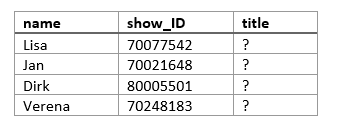

In [34]:
filmabend = {'name': ['Lisa', 'Dirk', 'Jan', 'Verena'], 'show_id': [70077542, 70021648, 80005501, 70248183]}

#########################################################################
###################TODO Lösung entfernen ################################
#########################################################################

filmabend_df = pd.DataFrame.from_dict(filmabend)

filmabend_titel_df = filmabend_df.merge(show_title_df, how= 'left', on='show_id')

pandas_lm.show_task(262, filmabend_titel_df)

,name,show_id,title
0,Lisa,70077542,The Bucket List
1,Dirk,70021648,Charlie and the Chocolate Factory
2,Jan,80005501,Iron Man & Captain America: Heroes United
3,Verena,70248183,Cloud Atlas


Output()

Output()

**2.6.3 Exportiere den in Aufgabe 1 und 2 entstandenen DataFrame in die Datanbanktabelle "netflix_titles_filmabend" der Datenbank lernmodul_pandas.db.**

In [33]:
#########################################################################
###################TODO Lösung entfernen ################################
#########################################################################

# Herstellen der Datenbankverbindung
con = sqlite3.connect('data/lernmodul_pandas.db')

# Erzeugen einer Datenbanktabelle auf der Basis eines DataFrames
filmabend_titel_df.to_sql('netflix_titles_filmabend', con, index = False, if_exists="replace")

# Schließen der Datenbankverbindung
con.close()

pandas_lm.show_task(263, filmabend_titel_df)

,Name,show_id,title
0,Lisa,70077542,The Bucket List
1,Dirk,70021648,Charlie and the Chocolate Factory
2,Jan,80005501,Iron Man & Captain America: Heroes United
3,Verena,70248183,Cloud Atlas


Output()

Output()

<div style="background-color: #150458 ; padding: 5px; "></div>

## **3** <a id='datenanalyse'>Datenanalyse</a>

### **3.1** <a id='datenAnzeigen'>Anzeigen der Daten</a>

In einem Jupyter Notebook kann ein DataFrame einfach angezeigt werden, indem der Name des DataFrames in eine Zelle geschrieben und diese ausgeführt wird.

In [45]:
netflix_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Mit den Methoden `head` und `tail` können jeweils die ersten oder letzten Datenreihen eines Dataframes angezeigt werden. Defaultmäßig werden 5 Datenreihen zurückgegeben. Sollen mehr Datenreihen angezeigt werden kann die Anzahl der gewünschten Reihen der Methode als Parameter übergeben werden.

In [46]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [47]:
netflix_titles_df.tail(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


### **3.2** <a id='kopie'>Erstellen einer Kopie der Daten</a>

An manchen Stellen kann es sinnvoll sein, eine Kopie des DataFrames zu erstellen, um zum Beispiel die originalen Daten noch in einem DataFrame zu behalten. Dafür gibt es die DataFrame Methode `copy`. Wird eine Kopie eines DataFrames berarbeitet werden ausschließlich die Daten der Kopie verändert.

In [48]:
netflix_titles_copy = netflix_titles_df.copy()

### **3.3** <a id='datenBeschreiben'>Beschreiben der Daten</a>

Das `shape` Attribut kann dazu genutzt werden zu schauen, wie groß der DataFrame ist. Unser DataFrame hat 6234 Einträge mit 12 Spalten

In [49]:
netflix_titles_df.shape

(6234, 12)

### **3.4** <a id='datenZugriff'>Zugriff auf Datenwerte</a>

Um auf die Spalte `title` des `netflix_titles_df` zugreifen zu können kann der Indexing Operator `[]` genutzt werden. Die Spalte des DataFrames wird dann als Series zurückgegeben.

In [52]:
netflix_titles_df['title']

0           Norm of the North: King Sized Adventure
1                        Jandino: Whatever it Takes
2                                Transformers Prime
3                  Transformers: Robots in Disguise
4                                      #realityhigh
                           ...                     
6229                                   Red vs. Blue
6230                                          Maron
6231         Little Baby Bum: Nursery Rhyme Friends
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 6234, dtype: object

Um auf einen spezifischen Wert innerhalb einer Spalte zuzugreifen wird der Indexing Operator `[]` ein weiteres Mal verwendet. Das folgende Beispiel gibt den Title der ersten Netfilx Show im DataFrame aus. 

In [53]:
netflix_titles_df['title'][0]

'Norm of the North: King Sized Adventure'

Der Indexing Operator `[]` aus den vorherigen Beispielen wird von Python bereitgestellt, um die Attribute eines Objektes auszulesen. Wie gezeigt, funktioniert dieser auch mit DataFrames. Pandas stellt allerdings auch eigene Operatoren zur Verfügung, mit denen auf die Daten in einem DataFrame zugegriffen werden kann. Diese Operatoren sind `loc` und `iloc`. Bei der Verwendung ist zu beachten, dass bei den Pandas Operatoren zuerst die Zeilen kommen und dann die Spalten. Beim Python Operator ist es genau anders herum.

Bei `iloc` basiert die Auswahl der Daten ihrer numerischen Position in den Daten. Mit dem Index 0 erhalten wir die Informationen zu der ersten Netflix Show in den Daten. Hier sprechen wir von einer index-basierten Auswahl.

In [55]:
netflix_titles_df.iloc[0]

show_id                                                  81145628
type                                                        Movie
title                     Norm of the North: King Sized Adventure
director                                 Richard Finn, Tim Maltby
cast            Alan Marriott, Andrew Toth, Brian Dobson, Cole...
country                  United States, India, South Korea, China
date_added                                      September 9, 2019
release_year                                                 2019
rating                                                      TV-PG
duration                                                   90 min
listed_in                      Children & Family Movies, Comedies
description     Before planning an awesome wedding for his gra...
Name: 0, dtype: object

Wie bereits erwähnt werden bei dem Pandas Operator `iloc` zunächst die Zeilen betrachtet. Eine Spalte kann wie folgt ausgegeben werden:

In [57]:
netflix_titles_df.iloc[:,0]

0       81145628
1       80117401
2       70234439
3       80058654
4       80125979
          ...   
6229    80000063
6230    70286564
6231    80116008
6232    70281022
6233    70153404
Name: show_id, Length: 6234, dtype: int64

Mithilfe des `:` werden alle Daten ausgewählt. Hinter dem Komma wird der Index der jeweiligen Spalte bzw. der jeweiligen Spalten angegeben. Um die ersten 5 Zeilen der Spalte `titles` auszugeben muss der Spaltenindex `2` verwendet werden, da dies der Position dieser Spalte in dem DataFrame entspricht. Vor dem Komma werden die auszugebenden Zeilen eingetragen. Wird `:` in Kombination mit Zahlen verwendet stellt dies immer eine Wertebereich dar. Um die ersten 5 Zeilen auszugeben muss also `:5` eingetragen werden. Was so viel bedeutet wie: Gib mir alle Zeilen bis zu dem Zeilenindex 5. Wobei die Zeile mit dem Index 5 nicht mehr ausgegeben wird.

In [59]:
netflix_titles_df.iloc[:5,2]

0    Norm of the North: King Sized Adventure
1                 Jandino: Whatever it Takes
2                         Transformers Prime
3           Transformers: Robots in Disguise
4                               #realityhigh
Name: title, dtype: object

Mit negativen Zahlen kann auf die Zeilen am Ende des DataFrames zugegriffen werden. Mit dem Index `-1` wird also die letzte Zeile des DataFrames ausgegeben. 

In [61]:
netflix_titles_df.iloc[-1]

show_id                                                  70153404
type                                                      TV Show
title                                                     Friends
director                                                      NaN
cast            Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
country                                             United States
date_added                                                    NaN
release_year                                                 2003
rating                                                      TV-14
duration                                               10 Seasons
listed_in                          Classic & Cult TV, TV Comedies
description     This hit sitcom follows the merry misadventure...
Name: 6233, dtype: object

Bei `loc` basiert die Auswahl der Daten auf dem Indexwert, nicht der Position in den Daten. Hier sprechen wir von einer label-basierten Auswahl. Die Spalten werden in diesem Fall also nicht über einen Index ausgewählt, sondern indem der Name der Spalte eingefügt wird. 

In [65]:
netflix_titles_df.loc[:,'title']

0           Norm of the North: King Sized Adventure
1                        Jandino: Whatever it Takes
2                                Transformers Prime
3                  Transformers: Robots in Disguise
4                                      #realityhigh
                           ...                     
6229                                   Red vs. Blue
6230                                          Maron
6231         Little Baby Bum: Nursery Rhyme Friends
6232    A Young Doctor's Notebook and Other Stories
6233                                        Friends
Name: title, Length: 6234, dtype: object

Zudem ist bei der Verwendung von `iloc` und `loc` zu beachten, dass `iloc` bei der Angabe eines Indexbereiches der letzte Index nicht inkludiert. Bei `loc` wird dieser allerdings mit zurückgegeben. Um die ersten drei Zeilen eines DataFrames auszugeben muss also entweder `iloc[:3]` oder `loc[:2]` verendet werden. Zu diesem Unterschied kommt es, da bei `loc` Spalten durch deren Namen ausgewähhlt werden können. Hierbei möchte man genau den Bereich der angegebenen Spalten zurück bekommen. 

In [69]:
# Platz zum Ausprobieren
netflix_titles_df.iloc[:, 1:3]

,type,title
0,Movie,Norm of the North: King Sized Adventure
1,Movie,Jandino: Whatever it Takes
2,TV Show,Transformers Prime
3,TV Show,Transformers: Robots in Disguise
4,Movie,#realityhigh
...,...,...
6229,TV Show,Red vs. Blue
6230,TV Show,Maron
6231,Movie,Little Baby Bum: Nursery Rhyme Friends
6232,TV Show,A Young Doctor's Notebook and Other Stories


In [72]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### **3.5** <a id='datenBedingung'>Bedingte Auswahl von Daten</a>

Im voherigen Abschnitt haben wir gelernt, wie auf einzelne Spalten, Zeilen oder Zellwerte zugegriffen werden kann. In einige Fällen müssen Daten allerdings aufgrund von bestimmten Bedingungen ausgewählt werden. Zum Beispiel wollen wir alle Netflix Shows selektieren, die vom `type` ein `Movie` sind. Mithilfe `netflix_titles_df['type'] == 'Movie'` wird eine Series ausgegeben, die für jede Zeile angibt, ob es sich um einen `Movie` handelt oder nicht.

In [76]:
netflix_titles_df['type'] == 'Movie'

0        True
1        True
2       False
3       False
4        True
        ...  
6229    False
6230    False
6231     True
6232    False
6233    False
Name: type, Length: 6234, dtype: bool

Dies kannn nun mithilfe des Indexing Operators `loc` verwendet werden, um die entsprechenden Zeilen auszugeben. 

In [78]:
netflix_titles_df.loc[netflix_titles_df['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


Mit den Operatoren `&` und `|` können so verschiedene Bedingungen zusammen verwendet werden. Im Beispiel sollen alle Filme ausgewählt werden, die nach 2018 herausgebracht wurden.

In [80]:
netflix_titles_df.loc[(netflix_titles_df['type'] == 'Movie') & (netflix_titles_df['release_year'] > 2017)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
27,80203094,Movie,City of Joy,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...
30,80988892,Movie,Next Gen,"Kevin R. Adams, Joe Ksander","John Krasinski, Charlyne Yi, Jason Sudeikis, M...","China, Canada, United States","September 7, 2018",2018,TV-PG,106 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When lonely Mai forms an unlikely bond with a ...
31,80239639,Movie,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,"September 7, 2018",2018,PG-13,106 min,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...
32,80159586,Movie,The Most Assassinated Woman in the World,Franck Ribière,"Anna Mouglalis, Niels Schneider, André Wilms, ...","Belgium, United Kingdom, United States","September 7, 2018",2018,TV-MA,102 min,"Dramas, International Movies, Thrillers","In 1930s Paris, an actress famous for her gory..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5476,80210602,Movie,I Am Maris,Laura VanZee Taylor,Maris Degener,United States,"April 1, 2019",2018,TV-14,54 min,Documentaries,"Through her own words and art, a young woman d..."
5477,81088283,Movie,Jesus: Countdown to Calvary,Gerry Hoban,Hugh Bonneville,"Ireland, United States, France","April 1, 2019",2018,TV-14,53 min,"Documentaries, Faith & Spirituality",Host Hugh Bonneville traces Jesus' last days t...
5485,81052280,Movie,Pinky Memsaab,Shazia Ali Khan,"Hajira Yamin, Kiran Malik, Adnan Jaffar, Sunny...","Pakistan, United Arab Emirates","April 1, 2019",2018,TV-14,124 min,"Dramas, Independent Movies, International Movies",When a guileless young woman becomes the domes...
5497,81088284,Movie,The World's Most Wanted Animal,Victoria Bromley,Maria Diekmann,United Kingdom,"April 1, 2019",2018,TV-PG,53 min,Documentaries,A conservationist shares her emotional journey...


### **3.6** <a id='spaltenUmbenennen'>Umbenennen von Spaltennamen</a>

### **3.7** <a id='datentypen'>Datentypen der Spalten</a>

### **3.8** <a id='datenUntersuchen'>Untersuchen der Daten</a>

<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### **3.9** <a id='uebungsteil3'>Übungsteil</a>

<div style="background-color: #150458 ; padding: 5px; "></div>

## **4** <a id='datenbereinigung'>Datenbereinigung</a>

<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### Übungsteil

<div style="background-color: #150458 ; padding: 5px; "></div>

## **5** <a id='datenmanipulation'>Datenmanipulation</a>

<div style="background-color: #FFCA00 ; padding: 5px; "></div>

### Übungsteil

<div style="background-color: #E70488 ; padding: 5px; "></div>

## **6** Abschlussaufgabe